In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from corner import corner


In [2]:
LENS = 'nfw'
CONSTRAINT = 'pos_second_iteration'
# CONSTRAINT = 'pos&flux'
mcmc_result = pd.read_csv("../" + LENS + f"/out_mcmc_{CONSTRAINT}.dat", sep='\s+')
mcmc_result

,chi_square,mass,posx,posy,ellipticity,position_angle,concentration
0,16.61171,4.219537e+11,0.360722,0.550278,0.193104,-31.16780,79.96860
1,16.58792,4.168423e+11,0.363612,0.544049,0.193585,-30.54263,79.84574
2,18.49837,4.133714e+11,0.362548,0.549724,0.195462,-30.53168,79.98541
3,16.60352,4.167533e+11,0.363147,0.544498,0.195484,-30.39523,80.21677
4,16.18049,4.224854e+11,0.362630,0.544955,0.194456,-30.51346,80.18315
...,...,...,...,...,...,...,...
7158,15.29347,3.951500e+11,0.369901,0.545196,0.200731,-31.21896,84.48168
7159,17.64979,3.927598e+11,0.372435,0.544930,0.201444,-31.45000,84.73976
7160,16.42193,4.006545e+11,0.373402,0.548246,0.200937,-31.32806,84.34604
7161,19.75503,3.914944e+11,0.377838,0.548749,0.200355,-31.52849,84.71016


In [3]:
mcmc_result.median(axis=0)

chi_square        1.734781e+01
mass              4.064326e+11
posx              3.710504e-01
posy              5.501590e-01
ellipticity       1.910672e-01
position_angle   -3.077965e+01
concentration     8.231899e+01
dtype: float64

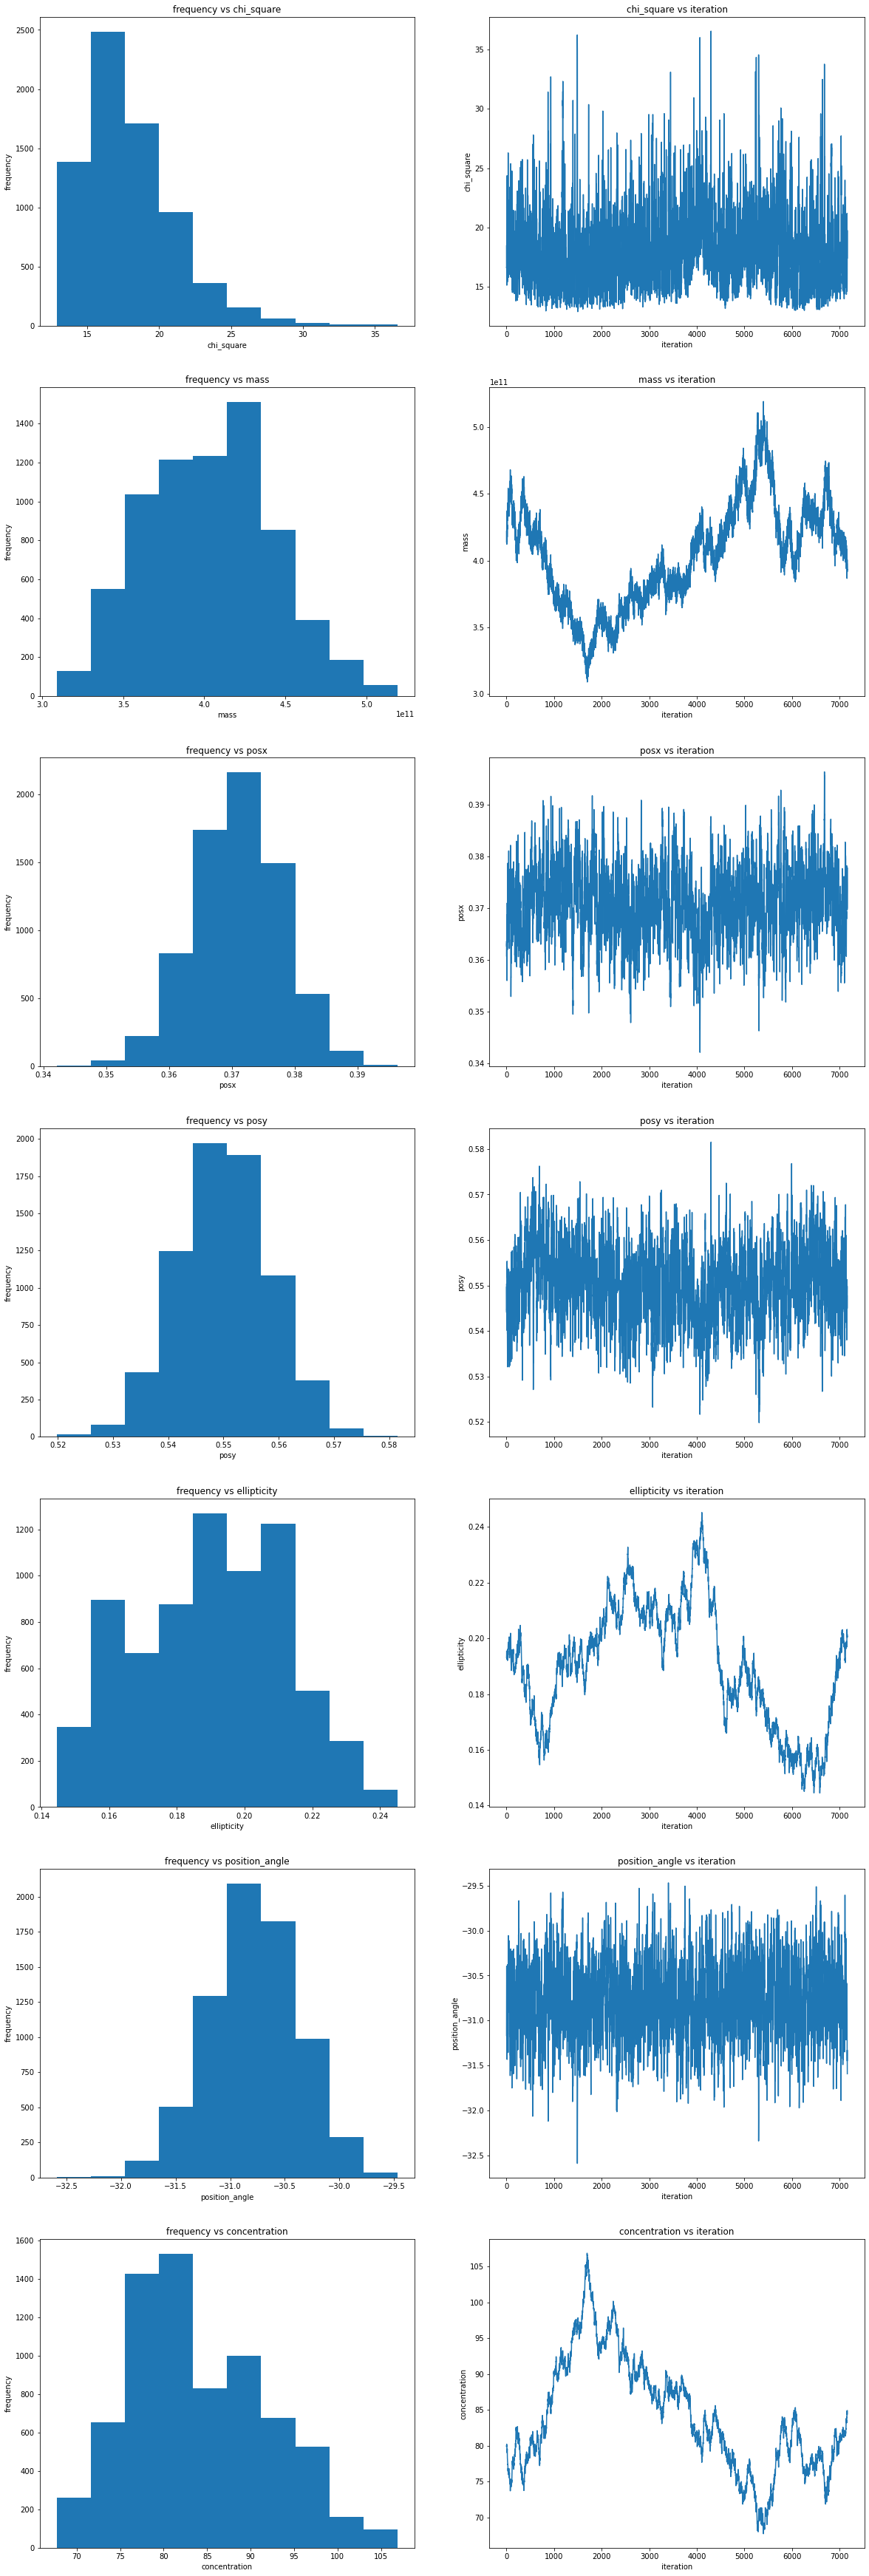

In [4]:
iter_axis = np.arange(1, len(mcmc_result)+1, 1)
header = list(mcmc_result.keys())
n_col = len(header)
fig, ax = plt.subplots(n_col, 2, figsize=(20, 9*n_col))
for i, col_name in enumerate(header):
    ax[i][0].hist(mcmc_result[col_name])
    ax[i][0].set(xlabel=col_name, ylabel='frequency', title=f"frequency vs {col_name}")
    ax[i][1].plot(iter_axis, mcmc_result[col_name])
    ax[i][1].set(xlabel='iteration', ylabel=col_name, title=f"{col_name} vs iteration")

fig.savefig(f"../fig/mcmc_history_{LENS}_{CONSTRAINT}.png", facecolor='white')

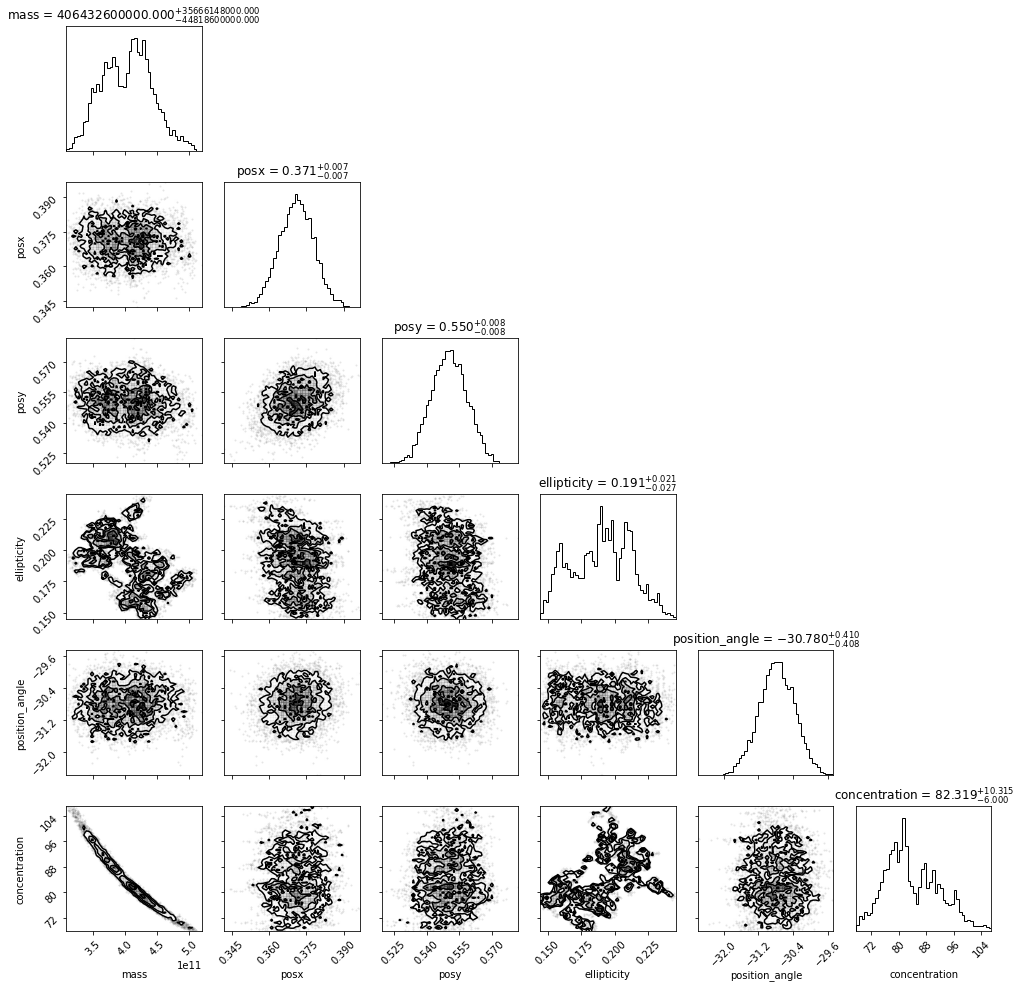

In [5]:
samples = np.array(mcmc_result)[:,1:]
figure = corner(samples,  labels=header[1:],title_fmt='.3f', title_kwargs={'fontsize': 12}, show_titles=True, bins=50)
plt.tight_layout()
plt.savefig(f"../fig/mcmc_corner_{LENS}_{CONSTRAINT}.png", facecolor='white') 
plt.show()